# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
new_lat=[]
new_lng=[]


In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)    

len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=ac754380fe45caa109559606cd682047&units=metric&q=


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
temp_max=[]    
humidity=[]       
wind=[]
cloudiness=[]
new_city=[]
latitude=[]
longitude=[]
country=[]
date=[]

city_counter=0

for city in cities:
    # Build partial query URL
    
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    try:
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        new_city.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        print(f"{city} ID: {response['id']} found! Appending stats")

        # Handle exceptions for a city that is not available in the Openweather API
    except:
        # Append null values
        print("City not found")
        pass


avarua ID: 4035715 found! Appending stats
saint george ID: 5546220 found! Appending stats
City not found
saldanha ID: 3361934 found! Appending stats
port alfred ID: 964432 found! Appending stats
City not found
korla ID: 1529376 found! Appending stats
puerto ayora ID: 3652764 found! Appending stats
hilo ID: 5855927 found! Appending stats
la primavera ID: 3678000 found! Appending stats
nhulunbuy ID: 2064735 found! Appending stats
misratah ID: 2214846 found! Appending stats
soe ID: 1626703 found! Appending stats
kurumkan ID: 2021188 found! Appending stats
college ID: 5859699 found! Appending stats
saint-philippe ID: 935215 found! Appending stats
atuona ID: 4020109 found! Appending stats
rikitea ID: 4030556 found! Appending stats
punta arenas ID: 3874787 found! Appending stats
busselton ID: 2075265 found! Appending stats
east london ID: 1006984 found! Appending stats
albany ID: 5106841 found! Appending stats
chokurdakh ID: 2126123 found! Appending stats
cherskiy ID: 2126199 found! Appendin

roma ID: 5134295 found! Appending stats
dingle ID: 1714733 found! Appending stats
rincon ID: 4218882 found! Appending stats
pandan ID: 1695546 found! Appending stats
City not found
souillac ID: 933995 found! Appending stats
khanu woralaksaburi ID: 1152953 found! Appending stats
nikolskoye ID: 546105 found! Appending stats
masumbwe ID: 154654 found! Appending stats
san quintin ID: 3984997 found! Appending stats
longyearbyen ID: 2729907 found! Appending stats
fortuna ID: 5563839 found! Appending stats
savannah bight ID: 3601402 found! Appending stats
mersing ID: 1732826 found! Appending stats
broome ID: 5110365 found! Appending stats
takoradi ID: 2294915 found! Appending stats
rocha ID: 3440777 found! Appending stats
tiksi ID: 2015306 found! Appending stats
saskylakh ID: 2017155 found! Appending stats
City not found
svetlyy ID: 485660 found! Appending stats
sasaguri ID: 1852915 found! Appending stats
morehead ID: 4301317 found! Appending stats
dalvik ID: 2632287 found! Appending stats
li

kaka ID: 161901 found! Appending stats
pochutla ID: 3517970 found! Appending stats
freeport ID: 5117949 found! Appending stats
filadelfia ID: 4560349 found! Appending stats
ludvika ID: 2693759 found! Appending stats
pitimbu ID: 3391889 found! Appending stats
brownsville ID: 4676740 found! Appending stats
chapais ID: 5919850 found! Appending stats
gaozhou ID: 1810295 found! Appending stats
kropotkin ID: 540761 found! Appending stats
pevek ID: 2122090 found! Appending stats
lahaina ID: 5849996 found! Appending stats
City not found
los llanos de aridane ID: 2514651 found! Appending stats
craig ID: 5576064 found! Appending stats
abu dhabi ID: 292968 found! Appending stats
City not found
morgan city ID: 4333811 found! Appending stats
kavieng ID: 2094342 found! Appending stats
ovalle ID: 3877918 found! Appending stats
beyneu ID: 610298 found! Appending stats
thabazimbi ID: 949683 found! Appending stats
naze ID: 1855540 found! Appending stats
City not found
ukiah ID: 5404476 found! Appending 

kulhudhuffushi ID: 1337613 found! Appending stats
gevrai ID: 1271413 found! Appending stats
City not found
hambantota ID: 1244926 found! Appending stats
doha ID: 290030 found! Appending stats
atbasar ID: 1526038 found! Appending stats
palu ID: 1633034 found! Appending stats
santa barbara ID: 5392967 found! Appending stats
verkhneye dubrovo ID: 1487520 found! Appending stats
mizan teferi ID: 330534 found! Appending stats
dzhebariki-khaya ID: 2024626 found! Appending stats
saint anthony ID: 5044290 found! Appending stats
mildura ID: 2157698 found! Appending stats
biggar ID: 2655692 found! Appending stats
umm kaddadah ID: 364933 found! Appending stats
ovsyanka ID: 1495797 found! Appending stats
City not found
hamilton ID: 4513583 found! Appending stats
koson ID: 1217007 found! Appending stats
dno ID: 565885 found! Appending stats
am timan ID: 245338 found! Appending stats
barentu ID: 342711 found! Appending stats
City not found
gazojak ID: 1514792 found! Appending stats
chiredzi ID: 89348

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
response

{'coord': {'lon': -86.1758, 'lat': 39.447},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 18.05,
  'feels_like': 17.14,
  'temp_min': 15.99,
  'temp_max': 19.01,
  'pressure': 1017,
  'humidity': 47,
  'sea_level': 1017,
  'grnd_level': 988},
 'visibility': 10000,
 'wind': {'speed': 7.59, 'deg': 226, 'gust': 14.76},
 'clouds': {'all': 39},
 'dt': 1650040148,
 'sys': {'type': 1,
  'id': 4345,
  'country': 'US',
  'sunrise': 1650020837,
  'sunset': 1650068502},
 'timezone': -14400,
 'id': 4255151,
 'name': 'Bud',
 'cod': 200}

In [7]:

print(f'The city count is {len(new_city)}')
print(f'The latitude count is {len(latitude)}')
print(f'The longitude count is {len(longitude)}')
print(f'The max temp count is {len(temp_max)}')
print(f'The humidity count is {len(humidity)}')
print(f'The wind count is {len(wind)}')
print(f'The country count is {len(country)}')
print(f'The date count is {len(date)}')


The city count is 567
The latitude count is 567
The longitude count is 567
The max temp count is 567
The humidity count is 567
The wind count is 567
The country count is 567
The date count is 567


In [8]:
#Create new dataframe from the series pulled
weather_df=pd.DataFrame(list(zip(new_city,latitude,longitude,temp_max,humidity,cloudiness,wind,country,date)),columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])
#export the city data into a csv
weather_df.to_csv("../Output/weather.csv", index=False, header=True)
weather_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,23.03,100,6,1.03,CK,1650039761
1,Saint George,37.1041,-113.5841,17.46,19,0,1.54,US,1650039745
2,Saldanha,-33.0117,17.9442,20.03,55,0,10.76,ZA,1650039648
3,Port Alfred,-33.5906,26.8910,16.21,81,99,1.34,ZA,1650039750
4,Korla,41.7597,86.1469,15.11,13,0,4.12,CN,1650039939
5,Puerto Ayora,-0.7393,-90.3518,26.98,80,60,5.29,EC,1650039784
6,Hilo,19.7297,-155.0900,23.49,88,75,3.09,US,1650039764
7,La Primavera,5.4906,-70.4092,31.74,49,98,1.06,CO,1650039940
8,Nhulunbuy,-12.2333,136.7667,26.34,89,75,6.69,AU,1650039941
9,Misratah,32.3754,15.0925,20.50,62,0,5.66,LY,1650039700


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#show count of rows (records) in new weather dataframe
weather_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [10]:
#create dataframe of cities where humidity is 100 and show a count of the cities 
humidity100=weather_df.loc[weather_df['Humidity']>100,:]
len(humidity100)

0

In [11]:
#  Get the indices of cities that have humidity over 100%.
humidity100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data=weather_df.drop(weather_df[weather_df['Humidity'] > 100].index, inplace = False)    

In [13]:
#show cities where humidity is equal to 100 after cleaning dataframe and creating new one 
humidity100=clean_city_data.loc[clean_city_data['Humidity']>100,:]
len(humidity100)

0

In [14]:
clean_city_data.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'City Temperature')

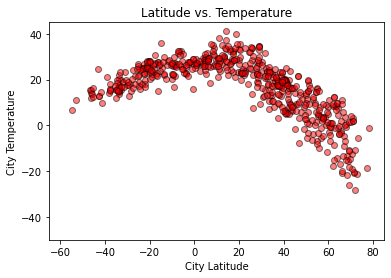

In [15]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Max Temp']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black",
            alpha=.5)
plt.xlim(-65,85)
plt.ylim(-50, 45)
plt.title('Latitude vs. Temperature')
plt.xlabel('City Latitude')
plt.ylabel('City Temperature')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'City Humidity')

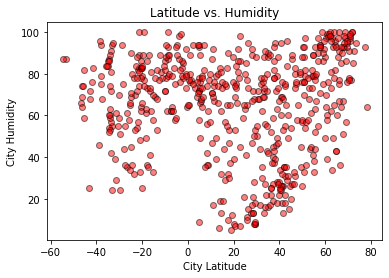

In [16]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black",
            alpha=.5)

plt.title('Latitude vs. Humidity')
plt.xlabel("City Latitude")
plt.ylabel("City Humidity")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'City Cloudiness')

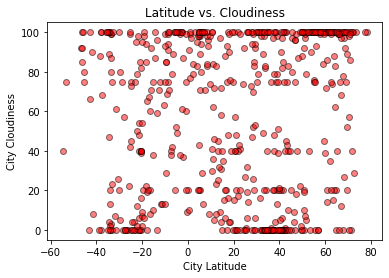

In [17]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Cloudiness']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black",
            alpha=.5)

plt.ylim(-5, 105)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('City Latitude')
plt.ylabel('City Cloudiness')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'City Wind Speed (mph)')

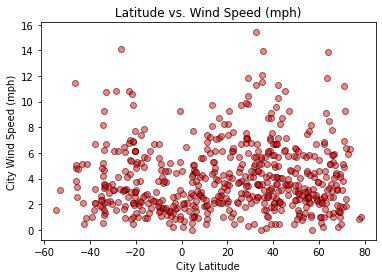

In [18]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black",
            alpha=.5)

plt.title('Latitude vs. Wind Speed (mph)')
plt.xlabel('City Latitude')
plt.ylabel('City Wind Speed (mph)')

## Linear Regression

In [19]:
south_df=clean_city_data.loc[clean_city_data['Lat']<0,:]
north_df=clean_city_data.loc[clean_city_data['Lat']>0,:]
print(f'There are {len(south_df)} cities in the southern hemisphere')
print(f'There are {len(north_df)} cities in the southern hemisphere')

There are 171 cities in the southern hemisphere
There are 396 cities in the southern hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7242061229463242


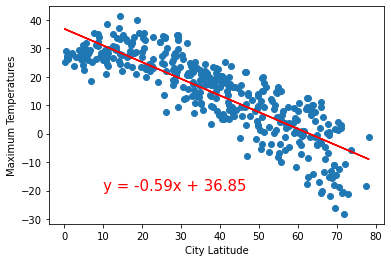

In [20]:

x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Maximum Temperatures')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5591408676139416


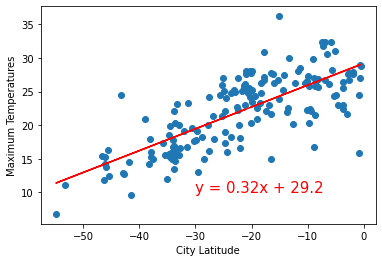

In [21]:

x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Maximum Temperatures')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05928372334778289


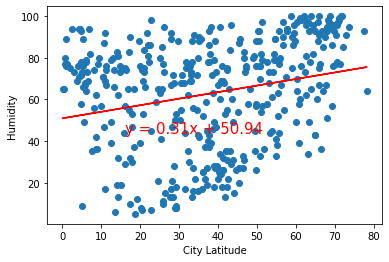

In [22]:

x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.045491459567353065


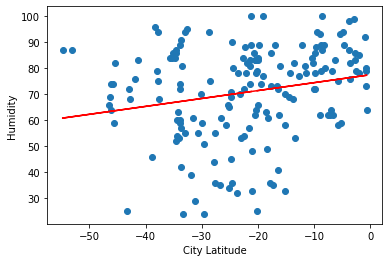

In [23]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.015233259538937052


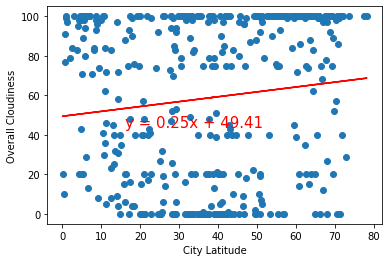

In [24]:

x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Overall Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0082348809594406


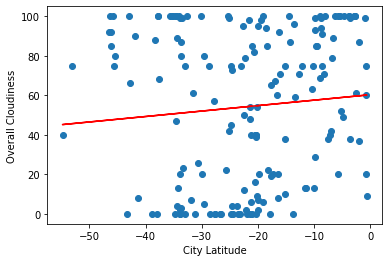

In [25]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Overall Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 2.583049344381129e-05


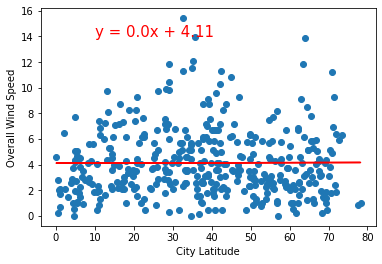

In [26]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,14),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Overall Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02094581008712597


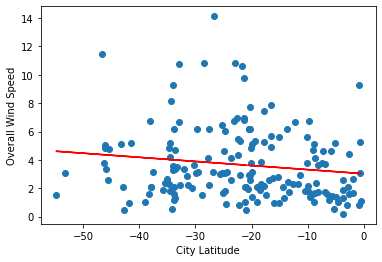

In [27]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,14),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Overall Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()